In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import cartopy.crs as ccrs
import cartopy.feature as cfeature
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Crash_Data.csv")

In [3]:
df.shape

(52843, 23)

In [4]:
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [5]:
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52842,19896063,Tas,1,1989,Tuesday,12:40,Multiple,No,NaN,No,...,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day


### Limpeza dos Dados

In [7]:
df.columns[[10, 14, 15, 16, 17]]

Index(['Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type'],
      dtype='object')

In [8]:
df.iloc[:, [10, 14, 15, 16, 17]].head()

,Speed Limit,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type
0,NaN,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road
1,110,Major Cities of Australia,Adelaide - North,Playford (C),NaN
2,NaN,Inner Regional Australia,Hume,Wangaratta (RC),Access road
3,NaN,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road
4,NaN,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road


In [9]:
df.drop(columns=df.columns[[10, 14, 15, 16, 17]], inplace=True)

In [10]:
df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Bus Involvement                  object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Road User                        object
Gender                           object
Age                               int64
Christmas Period                 object
Easter Period                    object
Age Group                        object
Day of week                      object
Time of day                      object
dtype: object

In [11]:
df.isna().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Road User                            0
Gender                              27
Age                                  0
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [12]:
df.dropna(subset=['Time'], inplace=True)

In [13]:
df.drop(columns=['Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement'], inplace=True)

In [14]:
df['Gender'].value_counts(dropna=False)

Gender
Male           37781
Female         14994
NaN               27
Unspecified        1
Name: count, dtype: int64

In [15]:
df['Gender'] = df['Gender'].fillna('Unspecified')

In [16]:
df['Age Group'].value_counts(dropna=False)

Age Group
17_to_25       13753
40_to_64       13406
26_to_39       12355
75_or_older     5109
0_to_16         4079
65_to_74        4012
NaN               89
Name: count, dtype: int64

In [17]:
def define_age_group(age):
    if pd.isna(age):
        return 'Unspecified'
    elif age <= 16:
        return '0/16'
    elif age <= 25:
        return '17/25'
    elif age <= 39:
        return '26/39'
    elif age <= 64:
        return '40/64'
    elif age <= 74:
        return '65/74'
    else:
        return '75+'

df['Age Group'] = df['Age'].apply(define_age_group)

In [18]:
df['Age Group'].value_counts(dropna=False)

Age Group
17/25    13753
40/64    13406
26/39    12355
75+       5109
0/16      4168
65/74     4012
Name: count, dtype: int64

In [19]:
df.isna().sum()

Crash ID            0
State               0
Month               0
Year                0
Dayweek             0
Time                0
Crash Type          0
Road User           0
Gender              0
Age                 0
Christmas Period    0
Easter Period       0
Age Group           0
Day of week         0
Time of day         0
dtype: int64

In [20]:
df.sort_values(by="Age")

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
20490,20051357,NSW,12,2005,Friday,2:00,Single,Pedestrian,Male,-9,No,No,0/16,Weekday,Night
45977,19911057,NSW,10,1991,Sunday,21:50,Multiple,Passenger,Female,-9,No,No,0/16,Weekend,Night
34301,19971119,NSW,11,1997,Saturday,6:00,Single,Motorcycle rider,Male,-9,No,No,0/16,Weekend,Day
38558,19951420,NSW,8,1995,Thursday,22:05,Single,Pedestrian,Female,-9,No,No,0/16,Weekday,Night
42919,19932288,Vic,5,1993,Sunday,9:00,Single,Passenger,Female,-9,No,No,0/16,Weekend,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42244,19935183,WA,10,1993,Wednesday,12:30,Single,Passenger,Female,99,No,No,75+,Weekday,Day
31365,19995044,WA,6,1999,Sunday,18:30,Multiple,Passenger,Female,99,No,No,75+,Weekend,Night
8150,20141199,NSW,11,2014,Monday,11:45,Single,Pedestrian,Male,100,No,No,75+,Weekday,Day
5214,20173155,Qld,4,2017,Friday,11:00,Multiple,Passenger,Female,101,No,No,75+,Weekday,Day


In [21]:
df = df[df["Age"] >= 0]

### Análise dos Dados

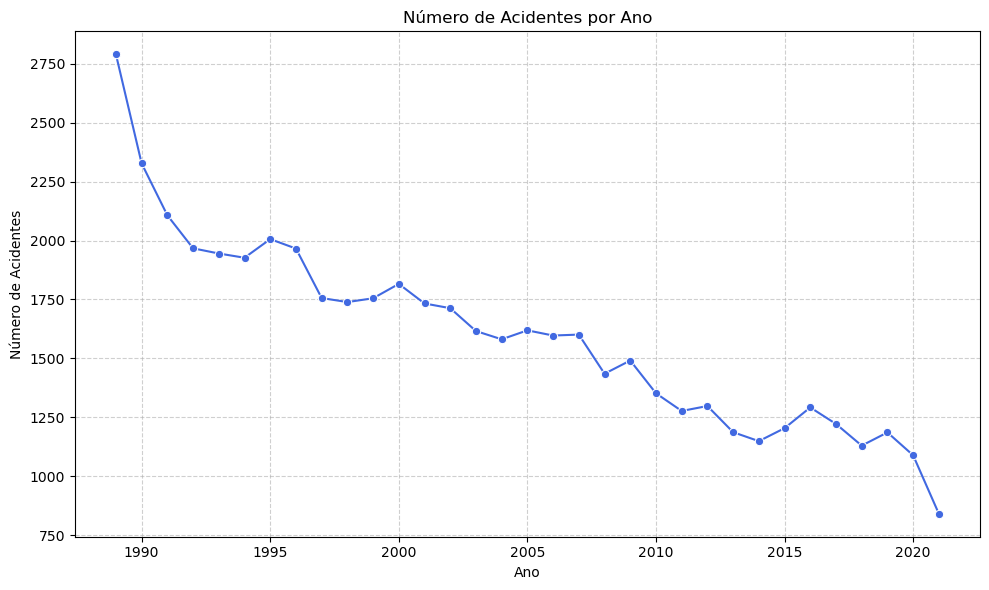

In [23]:
acidentes = df.groupby('Year').size().reset_index(name='Qtde')

plt.figure(figsize=(10, 6))
sns.lineplot(data=acidentes, x='Year', y='Qtde', marker='o', color='royalblue')

plt.title('Número de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

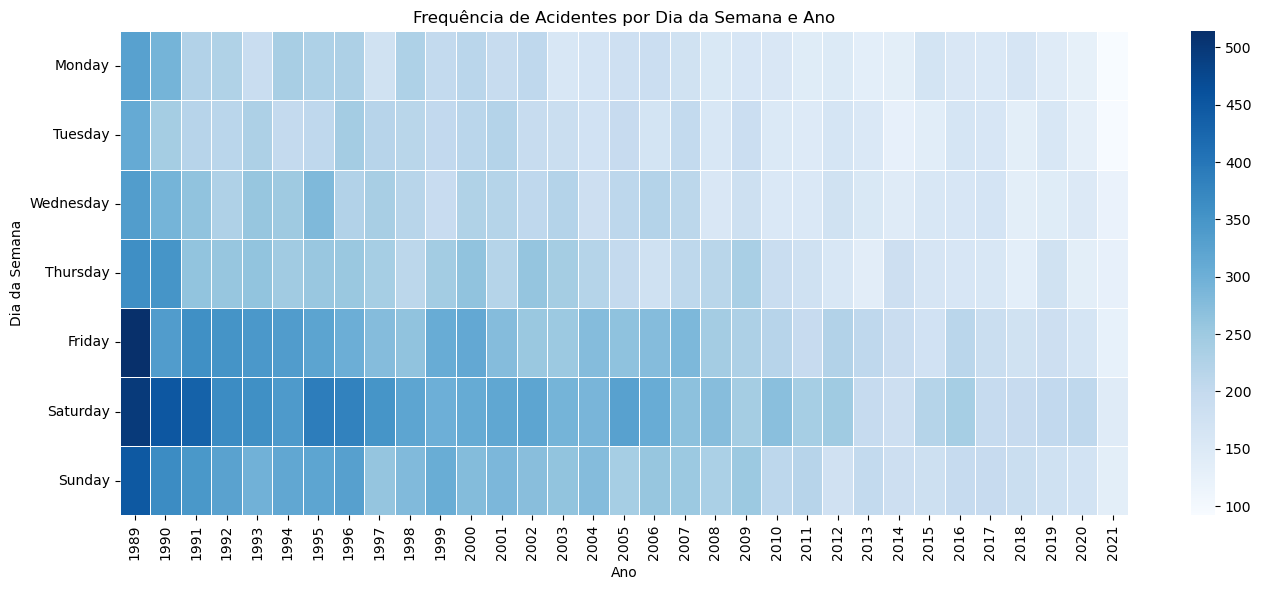

In [24]:
# Tabela de frequência: quantos acidentes por Ano e Dia da Semana
tabela = pd.crosstab(df['Dayweek'], df['Year'])

# Reordena os dias da semana (opcional)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tabela = tabela.reindex(dias_ordenados)

# Plot do heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(tabela, cmap='Blues', linewidths=0.5, linecolor='white')

plt.title('Frequência de Acidentes por Dia da Semana e Ano')
plt.xlabel('Ano')
plt.ylabel('Dia da Semana')
plt.tight_layout()
plt.show()

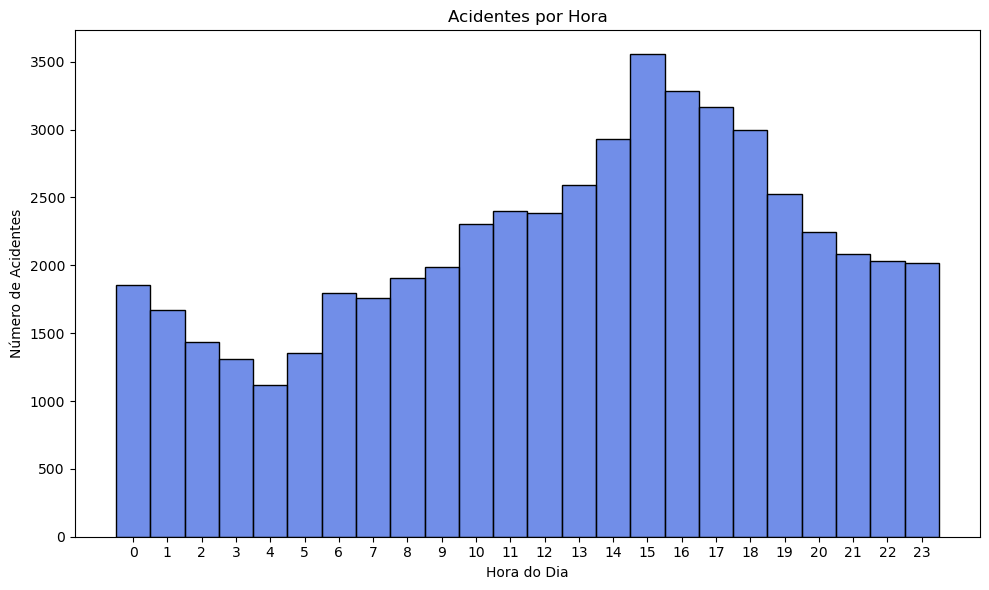

In [82]:
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Hour',
    bins=range(0, 25),  # de 0 a 24 horas
    discrete=True,
    color='royalblue',
    edgecolor='black'
)

plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.title('Acidentes por Hora')
plt.xticks(range(0, 24))  # garante que todas as horas apareçam
plt.tight_layout()
plt.show()

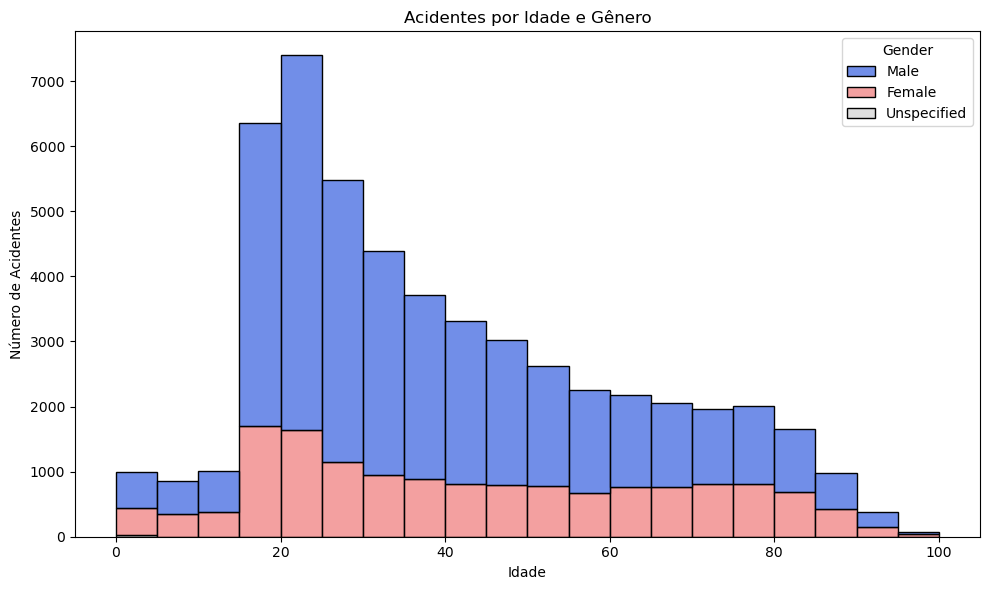

In [80]:
# Mapeia as cores para cada valor de Gender
custom_palette = {'Male': 'royalblue','Female': 'lightcoral','Unspecified': 'lightgray'}

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Age',
    hue='Gender',
    bins=range(0, 101, 5),
    multiple='stack',
    palette=custom_palette,
    edgecolor='black'
)

plt.xlabel('Idade')
plt.ylabel('Número de Acidentes')
plt.title('Acidentes por Idade e Gênero')
plt.tight_layout()
plt.show()

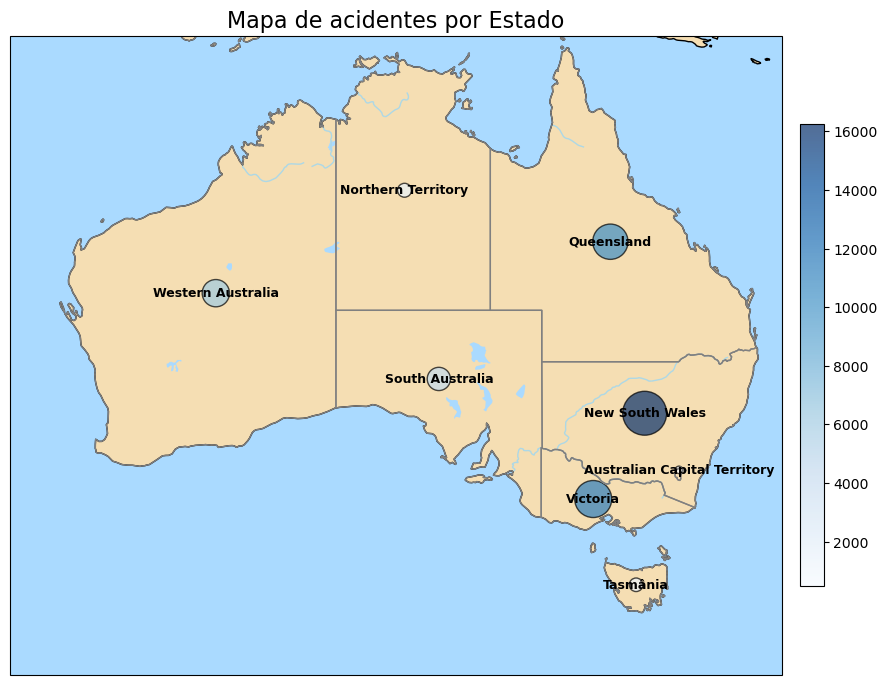

In [76]:
#Criacão de coluna de Estado com base nas siglas de State
state_name_map = {'NSW': 'New South Wales','Vic': 'Victoria','Qld': 'Queensland','WA': 'Western Australia',
'SA': 'South Australia','Tas': 'Tasmânia','NT': 'Northern Territory','ACT': 'Australian Capital Territory'}

df['State_Full'] = df['State'].map(state_name_map)

state_accidents = df['State_Full'].value_counts().to_dict()

state_coords = {'New South Wales': (147, -32),'Victoria': (144, -37),'Queensland': (145, -22),'Western Australia': (122, -25),
'South Australia': (135, -30),'Tasmânia': (146.5, -42),'Northern Territory': (133, -19),'Australian Capital Territory': (149, -35.3)}

states = list(state_coords.keys())
lons = [state_coords[s][0] for s in states]
lats = [state_coords[s][1] for s in states]
counts = np.array([state_accidents.get(s, 0) for s in states])

sizes = 1000 * (counts / counts.max())

# Detalhes do Mapa
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([110, 155, -45, -10])

ax.add_feature(cfeature.LAND, facecolor='#f5deb3')
ax.add_feature(cfeature.OCEAN, facecolor='#aadaff')
ax.add_feature(cfeature.LAKES, facecolor='#aadaff')
ax.add_feature(cfeature.RIVERS, edgecolor='lightblue')

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, edgecolor='gray')

cmap = plt.cm.Blues

sc = ax.scatter(lons, lats, s=sizes, c=counts, cmap=cmap, alpha=0.7, edgecolors='k', transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.6, pad=0.02)

for lon, lat, state in zip(lons, lats, states):
    ax.text(lon, lat, f"{state}", fontsize=9, ha='center', va='center', fontweight='bold')

plt.title('Mapa de acidentes por Estado', fontsize=16)
plt.show()